In [6]:
#그냥 클래스 연습 무시 해도 됨
class Bicycle:
    
    def __init__(self, gear=1, speed=0):
        self.gear = gear
        self.speed =speed
        
    def speed_accel(self,speed):
        self.speed += speed
        if(self.speed < 0):
            self.bicycle_break()
    
    def bicycle_break(self):
        self.speed = 0
    
b1 = Bicycle()
b1.speed_accel(30)
print(b1.speed)
b1.speed_accel(-40)
print(b1.speed)

30
0


In [57]:
#데이터 분리를 위해서 math.floor 함수를 위한 import
import math

#아래꺼는 그냥 그림 그리기 위해서 필요한 라이브러리 없어도 됨
from matplotlib import pyplot as plt
import numpy as np

In [52]:
# 파일 열고 라인별로 읽어들이기 r = 읽기 모드
f = open('simple.txt','r') #파일 위치는 개인마다 다르므로 조정 필요!!!
data = f.readlines()
f.close() #파일 닫기

# 데이터 처리한 후 저장할 리스트
process = []

# 맨 처음의 X,Y 무시/ 제거작업
data = data[1:]

# readllines로 분리한 문자열 데이터 -> 실수형으로 변환 과정
for i in range(len(data)):
    
    # 라인의 데이터 23.4  "'43,32'" 를 공백으로 분리
    data[i] = data[i].split()
    
    # 2번째 라인의 불필요한 ""을 제거 및 쉼표를 마침표로 변환
    # strip 함수 매개변수 없으면 양 옆 공백 제거
    data[i][1] = data[i][1].strip().strip('""').replace(',','.')
    
    #문자열을 수로 변환
    data[i][0],data[i][1] = float(data[i][0]),float(data[i][1])
    
    #처리된 데이터 리스트에 저장
    process.append([data[i][0],data[i][1]])
    
# 훈련:테스트 = 0.7: 0.3 (비율)
percent = math.floor(len(process)*0.7)
# 0~0.7까지 슬라이싱
tr_data = process[:percent]
#0.7부터 끝까지 슬라이싱
ts_data = process[percent:]


In [23]:
# mean 함수는 수로 이루어진 리스트로 받는다
def mean(data):
    
    sum_data = sum(data)
    mean1 = sum_data/len(data)
    
    return mean1

In [27]:
#분산 구하는 식//실제 분산은 아님// 입력은 리스트로
def val(data):
    mean2 = mean(data)
    cal = 0
    
    for i in data:
        cal += (i-mean2)**2

    return cal

In [84]:
# ML CLASS - 선형회귀
class ML:
    
    # 초기값은 트레이닝, 테스트 데이터
    def __init__(self, tr_data, ts_data):
        
        # w1, w0의 기본값(w1,w0의 선언)
        self.w1=0
        self.w0=0
        
        #트레이닝 데이터 입-출력 분할
        self.tr_x=[]
        self.tr_y=[]
        for i in range(len(tr_data)):
            self.tr_x.append(tr_data[i][0])
            self.tr_y.append(tr_data[i][1])
            
        #테스트 데이터 입-출력 분할
        self.ts_x=[]
        self.ts_y=[]
        for i in range(len(ts_data)):
            self.ts_x.append(ts_data[i][0])
            self.ts_y.append(ts_data[i][1])
        
        
    def training(self):
        
        #트레이닝 데이터 입-출력 평균
        self.tr_x_mean = mean(self.tr_x)
        self.tr_y_mean = mean(self.tr_y)
        self.tr_x_val = val(self.tr_x)
        
        self.cal1 = 0
        
        # w1 식의 윗부분
        for i in range(len(self.tr_x)): #반복은 훈련데이터의 길이만큼
            self.cal1 += (self.tr_y[i]-self.tr_y_mean)*(self.tr_x[i]-self.tr_x_mean)
        
        # val 함수는 w1의 분모부분 계산을 위한 함수
        self.w1 = self.cal1 / self.tr_x_val
        
        # 계산된 w1 값으로 미리구한 훈련데이터의 평균값으로 w0구하기
        self.w0 = self.tr_y_mean - self.w1*self.tr_x_mean
        
        # w1, w0가 잘 나오는 지 확인
        print(self.w1,self.w0)
    
    
    
    # test 부분 , test 데이터 사용 및 train함수가 선행 되어야 함
    def test(self):
        self.error=0
        self.count =0
        
        # test x값을 w1과 w0으로 만든 함수에 넣어 나온 예측 y값과 실제 y값의 차이
        # error은 그 차이는 제곱으로 해서 시그마 한다
        for i in range(len(self.ts_x)): #반복은 시험데이터의 길이만큼
            self.error = ( self.ts_y[i] - (self.ts_x[i]*self.w1 +self.w0))**2
            self.count +=1
            
        # 그냥 평균적인 에러가 얼마인지 궁금해서 넣은 부분
        self.error = self.error / self.count
        return self.error
    
    # 그림그리기
    def draw(self):

        self.graph_x = np.arange(0,80, 0.1)
        self.graph_y = self.w1*self.graph_x + self.w0

        plt.scatter(self.ts_x,self.ts_y)
        plt.plot(self.graph_x,self.graph_y)
        plt.show()
    

In [85]:
# tr_data는 훈련용 데이터로 전처리한 데이터의 70%의 데이터
# ts_data는 시험용 데이터로 전처리한 데이터의 30% 데이터
ML1 = ML(tr_data, ts_data)
#매개변수로 훈련용/시험용 데이터 셋 입력
#이 때 각 데이터는 X와 Y가 같이 들어가 있다. 궁금하면 출력해봐

In [86]:
# 룬련을 하고 나온 w1 , w0가 나오는지 확인도 필요
ML1.training()

3.459634054126571 12.716177295622813


In [87]:
# 훈련한 w1.w0로 시험데이터 훈련
ML1.test()

378.7734272084853

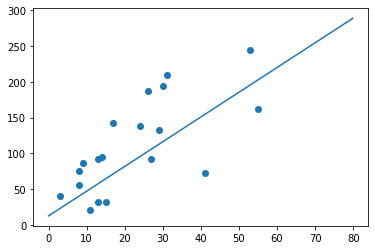

In [88]:
#심심해서 만든 잘 나오는지 확인하는 그림
ML1.draw()

P.S. 내가 그냥 만든거라 어딘가 틀린데도 있긴 하겠지만 이렇게도 가능하다 정도로만 봐